In [99]:
#1. Descripción general del dataset

In [100]:
Ruta = "c:/Users/amarino/Downloads/Project.xlsx"

In [101]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
df = pd.read_csv(Ruta)

C:\Users\amarino\AppData\Local\Temp\ipykernel_16360\2017943026.py:1: DtypeWarning: Columns (9,10,11,12,34,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(Ruta)


In [103]:
#Se cuenta con 156345 registros y 41 variables.
df.shape

(156345, 39)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156345 entries, 0 to 156344
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   OT                             156345 non-null  object 
 1   Visita                         156345 non-null  int64  
 2   FechaEntrada                   156345 non-null  object 
 3   FechaAsignacion                156345 non-null  object 
 4   FechaCierre                    156345 non-null  object 
 5   Tipo                           156345 non-null  object 
 6   Prioridad                      156345 non-null  object 
 7   SLA Cliente - DiAS Habiles     156345 non-null  int64  
 8   SLA Zona - DiAS Habiles        156345 non-null  int64  
 9   SLA Cliente - DiAS HabilesDec  156345 non-null  object 
 10  SLA Zona - DiAS HabilesDec     156345 non-null  object 
 11  %Vto                           156345 non-null  object 
 12  %VtoTecnico                   

In [105]:
df.head()

,OT,Visita,FechaEntrada,FechaAsignacion,FechaCierre,Tipo,Prioridad,SLA Cliente - DiAS Habiles,SLA Zona - DiAS Habiles,SLA Cliente - DiAS HabilesDec,...,Vendedor,Cuit,Agencia,Producto,UsuarioCierre,sRefCliente,Nro_Tarea,Telefono,Zona Cobertura,Propietario
0,VIS2976972,1,2023-11-27,2023-11-30,2023-12-01,PP,3 Días,2,0,"2,81",...,NaN,27-26961676-3,NaN,SMAR,ZONAGENERAL,388411,1.0,NaN,48.0,Concesionaria Siscard Papel VIP
1,VIS2972034,1,2023-11-15,2023-11-27,2023-12-01,RT,96 hs.,11,3,"11,61",...,NaN,30-71686006-6,NaN,PI09,ZONAGENERAL,87761,1.0,NaN,4500.0,Concesionaria Siscard
2,VIS2977769,1,2023-11-29,2023-11-30,2023-12-01,IN,1 Día,1,1,"1,89",...,NaN,20-92337858-9,NaN,SMAR,sdeparis,400496,1.0,NaN,24.0,Concesionaria Siscard
3,VIS2976839,1,2023-11-27,2023-11-27,2023-12-01,AV,96 hs.,3,3,"3,66",...,NaN,20-16715936-3,NaN,SMAR,ZONAGENERAL,387994,1.0,NaN,48.0,Concesionaria Siscard
4,VIS2977785,1,2023-11-29,2023-11-29,2023-12-01,PP,96 hs.,1,1,"1,9",...,NaN,30-54576087-4,NaN,SMAR,ZONAGENERAL,400492,1.0,NaN,48.0,Concesionaria Siscard Papel Masivo


In [106]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Visita,156345.0,1.000000e+00,0.000000e+00,1.0,1.0,1.0,1.0,1.0
SLA Cliente - DiAS Habiles,156345.0,9.264447e-01,3.108282e+00,0.0,0.0,0.0,1.0,156.0
SLA Zona - DiAS Habiles,156345.0,4.843263e-01,2.290807e+00,0.0,0.0,0.0,1.0,139.0
Numero Terminal,156345.0,2.017776e+07,7.852486e+06,0.0,16357263.0,16469563.0,18058164.0,51050566.0
Codigo Postal,156345.0,4.260914e+03,1.973731e+03,1414.0,2300.0,5000.0,5854.0,8512.0
Zona,156345.0,4.304185e+06,2.012065e+06,5.0,2300001.0,5000016.0,5870004.0,8000019.0
Vendedor,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Agencia,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Nro_Tarea,156344.0,1.854059e+00,4.289591e+00,1.0,1.0,1.0,2.0,101.0


In [107]:
duplicados = df.duplicated(subset=['Numero Terminal'], keep=False)

In [108]:
#Veo la cantidad de duplicados por terminal
df_duplicados = 'conteo_duplicados'
conteo_duplicados = df[duplicados]['Numero Terminal'].value_counts()

print("Conteo de valores duplicados:\n", conteo_duplicados)

Conteo de valores duplicados:
 Numero Terminal
0           1153
34086521      36
34175221      24
16247019      23
16227144      23
            ... 
16540465       2
16540280       2
16539760       2
16539133       2
16172423       2
Name: count, Length: 39599, dtype: int64


In [109]:
#Veo el total de casos duplicados
total_duplicados = df['Numero Terminal'].duplicated(keep=False).sum()
print(f"Total de valores duplicados: {total_duplicados}")
 

Total de valores duplicados: 114645


In [110]:
# Identifico duplicados en 'Numero Terminal' y creo una columna indicando si es duplicado
df['es_duplicado'] = df.duplicated(subset=['Numero Terminal'], keep=False).astype(int)

# Agrupo por 'Tipo' y sumo la columna 'es_duplicado' para contar los duplicados por 'Tipo'
df_duplicados_por_tipo = df.groupby('Tipo')['es_duplicado'].sum().reset_index()

# Ordenar el DataFrame para ver los tipos con más duplicados primero
df_duplicados_por_tipo = df_duplicados_por_tipo.sort_values(by='es_duplicado', ascending=False)


# Mostrar el DataFrame resultante
df.head()

,OT,Visita,FechaEntrada,FechaAsignacion,FechaCierre,Tipo,Prioridad,SLA Cliente - DiAS Habiles,SLA Zona - DiAS Habiles,SLA Cliente - DiAS HabilesDec,...,Cuit,Agencia,Producto,UsuarioCierre,sRefCliente,Nro_Tarea,Telefono,Zona Cobertura,Propietario,es_duplicado
0,VIS2976972,1,2023-11-27,2023-11-30,2023-12-01,PP,3 Días,2,0,"2,81",...,27-26961676-3,NaN,SMAR,ZONAGENERAL,388411,1.0,NaN,48.0,Concesionaria Siscard Papel VIP,0
1,VIS2972034,1,2023-11-15,2023-11-27,2023-12-01,RT,96 hs.,11,3,"11,61",...,30-71686006-6,NaN,PI09,ZONAGENERAL,87761,1.0,NaN,4500.0,Concesionaria Siscard,0
2,VIS2977769,1,2023-11-29,2023-11-30,2023-12-01,IN,1 Día,1,1,"1,89",...,20-92337858-9,NaN,SMAR,sdeparis,400496,1.0,NaN,24.0,Concesionaria Siscard,1
3,VIS2976839,1,2023-11-27,2023-11-27,2023-12-01,AV,96 hs.,3,3,"3,66",...,20-16715936-3,NaN,SMAR,ZONAGENERAL,387994,1.0,NaN,48.0,Concesionaria Siscard,1
4,VIS2977785,1,2023-11-29,2023-11-29,2023-12-01,PP,96 hs.,1,1,"1,9",...,30-54576087-4,NaN,SMAR,ZONAGENERAL,400492,1.0,NaN,48.0,Concesionaria Siscard Papel Masivo,1


In [111]:
#Para visualizar la cantidad de duplicado, me aseguro que las fechas de cierre tengan formato de fecha
df_mes = df['FechaCierre'] = pd.to_datetime(df['FechaCierre'])

In [112]:
df['Mes'] = df['FechaCierre'].dt.to_period('M')

In [113]:
#Para ver la cantidad de duplicados por tipo y mes, agrupo para que me muestre los resultados
df_duplicados_por_mes = df.groupby(['Tipo', 'Mes'])['es_duplicado'].sum().reset_index()


In [114]:
print(df_duplicados_por_mes)

   Tipo      Mes  es_duplicado
0    AV  2023-12          2657
1    AV  2024-01          2940
2    AV  2024-02          3040
3    AV  2024-03          2871
4    AV  2024-04          3064
5    AV  2024-05          2712
6    AV  2024-06          1845
7    AV  2024-07          2230
8    AV  2024-08          2243
9    AV  2024-09             1
10   CM  2023-12           176
11   CM  2024-01           155
12   CM  2024-02           214
13   CM  2024-03           135
14   CM  2024-04            61
15   CM  2024-05            75
16   CM  2024-06            33
17   CM  2024-07           201
18   CM  2024-08           174
19   IN  2023-12          2236
20   IN  2024-01          3188
21   IN  2024-02          2149
22   IN  2024-03          3762
23   IN  2024-04          3377
24   IN  2024-05          3870
25   IN  2024-06          2762
26   IN  2024-07          3050
27   IN  2024-08          3343
28   PP  2023-12          1987
29   PP  2024-01          2403
30   PP  2024-02          2328
31   PP 

In [115]:
#Los cierres fallidos no me sirven, por lo que elimino esos datos
valores_a_eliminar = ['CANCELPIL', 'COMPFALCC', 'COMPFALDI', 'COFASINVIS', 'COMPFALCL', 'CANCELCLI', 'COMPFANOEA', 'COMPFAPRAJ', 'CFSVIRETEL']
df.drop(df[df['Estado'].isin(valores_a_eliminar)].index, inplace=True)


In [116]:
#Las OT de SE, IN, CM, RT, PP no me sirven, por lo que elimino.
valores_a_eliminar = ['SE', 'IN', 'CM', 'RT', 'PP']
df.drop(df[df['Estado'].isin(valores_a_eliminar)].index, inplace=True)

C:\Users\amarino\AppData\Local\Temp\ipykernel_16360\1588988742.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mes', y='es_duplicado', data=df_duplicados_por_mes, palette='viridis')


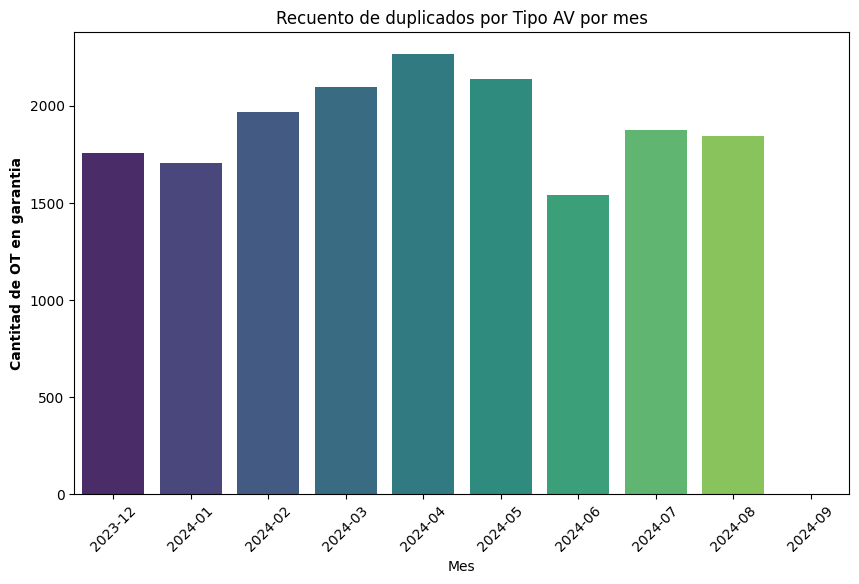

In [117]:
df_av = df[df['Tipo'] == 'AV'].copy()  
df_duplicados_por_mes = df_av.groupby('Mes')['es_duplicado'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Mes', y='es_duplicado', data=df_duplicados_por_mes, palette='viridis')
plt.title('Recuento de duplicados por Tipo AV por mes')
plt.ylabel('Cantitad de OT en garantia', fontweight = 'bold')
plt.xticks(rotation=45)
plt.show()

In [118]:
#Puedo hacer mayor precision sobre las OT en garantia, excluyendo los valores originales, para solo tener los duplicados.
df_av['es_duplicado'] = df_av.duplicated(subset=['Numero Terminal'], keep='first').astype(int)
df_av['Mes'] = df_av['FechaCierre'].dt.to_period('M')
df_duplicados_por_mes = df_av.groupby('Mes')['es_duplicado'].sum().reset_index()



C:\Users\amarino\AppData\Local\Temp\ipykernel_16360\14674392.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Mes', y='es_duplicado', data=df_duplicados_por_mes, palette='deep')


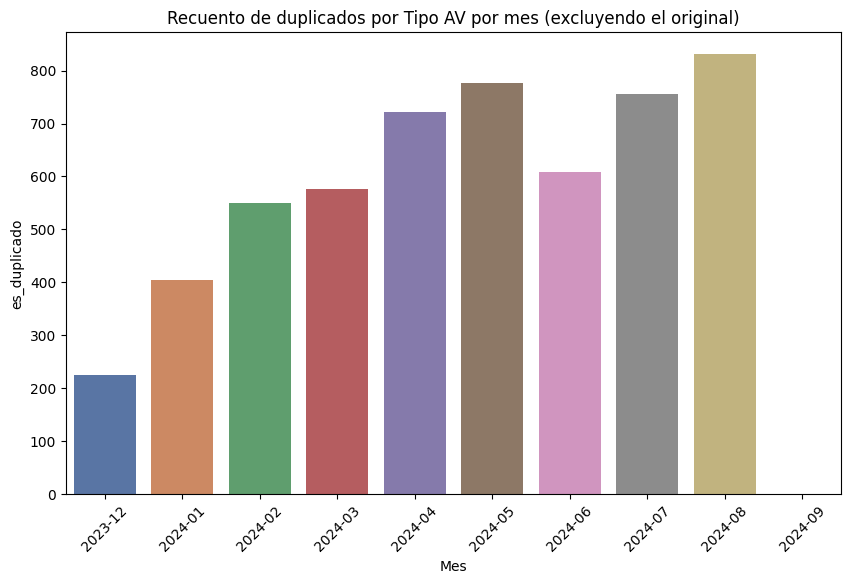

In [119]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Mes', y='es_duplicado', data=df_duplicados_por_mes, palette='deep')
plt.title('Recuento de duplicados por Tipo AV por mes (excluyendo el original)')
plt.xticks(rotation=45)
plt.show()

C:\Users\amarino\AppData\Local\Temp\ipykernel_16360\4246806685.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_av['es_duplicado'] = df_av.duplicated(subset=['Numero Terminal'], keep='first').astype(int)


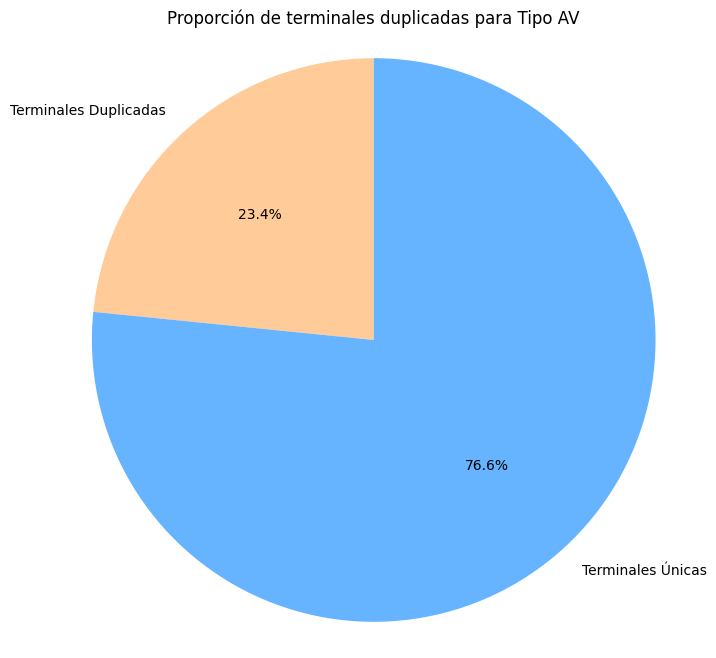

In [120]:
#Para profundizar el analisis, quiero visualizar que cantidad de terminales necesitan una nueva asistencia.

df_av = df[df['Tipo'] == 'AV']
df_av['es_duplicado'] = df_av.duplicated(subset=['Numero Terminal'], keep='first').astype(int)
df_repetidas_av = df_av.groupby('Numero Terminal').filter(lambda x: len(x) > 1)
conteo_terminales_repetidas = df_repetidas_av['Numero Terminal'].nunique()
conteo_terminales_no_repetidas = df_av['Numero Terminal'].nunique() - conteo_terminales_repetidas
labels = ['Terminales Duplicadas', 'Terminales Únicas']
sizes = [conteo_terminales_repetidas, conteo_terminales_no_repetidas]
colors = ['#ffcc99', '#66b3ff']  


plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
plt.axis('equal')  # Para asegurar que el gráfico sea un círculo
plt.title('Proporción de terminales duplicadas para Tipo AV')
plt.show()

C:\Users\amarino\AppData\Local\Temp\ipykernel_16360\2044230626.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_av['Mes'] = df_av['FechaCierre'].dt.to_period('M')


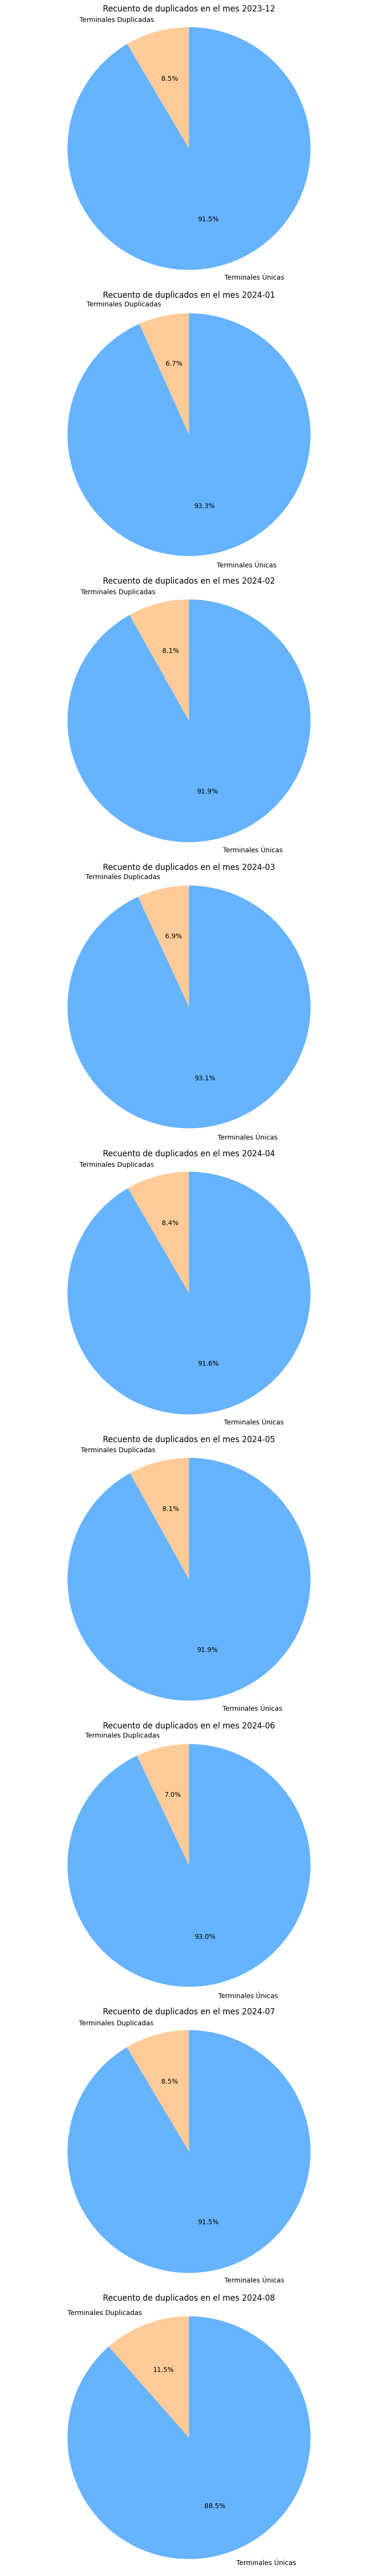

In [121]:
#Como se puede ver, del dataset, el 32.6% de las terminales, cuentan con mas de una asistencia por falla tecnica (AV)
#Para medir el impacto en lo que puede entrar en un periodo de garantia, vemos cuantas terminales cuentan con mas de 1 asistencia por mes.
df_av['Mes'] = df_av['FechaCierre'].dt.to_period('M')
df_av = df_av[df_av['Mes'] != '2024-09']

# Agrupar por mes
meses = df_av['Mes'].unique()

# Configurar la figura con múltiples subplots
fig, axes = plt.subplots(len(meses), 1, figsize=(8, len(meses) * 6))

# Iterar sobre los meses y generar un gráfico de torta para cada mes
for i, mes in enumerate(meses):
    # Filtrar por mes
    df_mes = df_av[df_av['Mes'] == mes]
    
    # Contar cuántas terminales se repiten más de una vez
    df_repetidas_mes = df_mes.groupby('Numero Terminal').filter(lambda x: len(x) > 1)
    conteo_terminales_repetidas = df_repetidas_mes['Numero Terminal'].nunique()
    conteo_terminales_no_repetidas = df_mes['Numero Terminal'].nunique() - conteo_terminales_repetidas
    
    # Datos para el gráfico de torta
    labels = ['Terminales Duplicadas', 'Terminales Únicas']
    sizes = [conteo_terminales_repetidas, conteo_terminales_no_repetidas]
    colors = ['#ffcc99', '#66b3ff']  # Colores que no sean verdes ni rojos

    # Crear gráfico de torta en el subplot
    axes[i].pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)
    axes[i].axis('equal')  # Para asegurarse de que sea un círculo
    axes[i].set_title(f'Recuento de duplicados en el mes {mes}')

# Ajustar el layout para evitar solapamientos
plt.tight_layout()
plt.show()

In [122]:
#Veo cantidad de terminales duplicadas mas de una vez y con el problema que presenta la orden.
df_av = df[df['Tipo'] == 'AV']
duplicados_av = df_av[df_av.duplicated(subset=['Numero Terminal'], keep='first')]
df_duplicados_av = df_av[df_av['Numero Terminal'].isin(duplicados_av['Numero Terminal'])]
conteo_categoria_av = df_duplicados_av['Primera Categoría'].value_counts()
print(conteo_categoria_av)

Primera Categoría
Bateria                           2775
Equipo dañado                     2731
Falla Operativa                   1936
Insumos de terminal                486
Error de comunicacion              441
Pax S920 a Pax S920-3DES           439
No lee tarjeta                     158
Cambio de Obsoleta a S920-3DES      56
Base de terminal                    21
Reposicion de equipo                16
Name: count, dtype: int64


C:\Users\amarino\AppData\Local\Temp\ipykernel_16360\1951595115.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_duplicados_av['Mes'] = df_duplicados_av['FechaCierre'].dt.to_period('M')


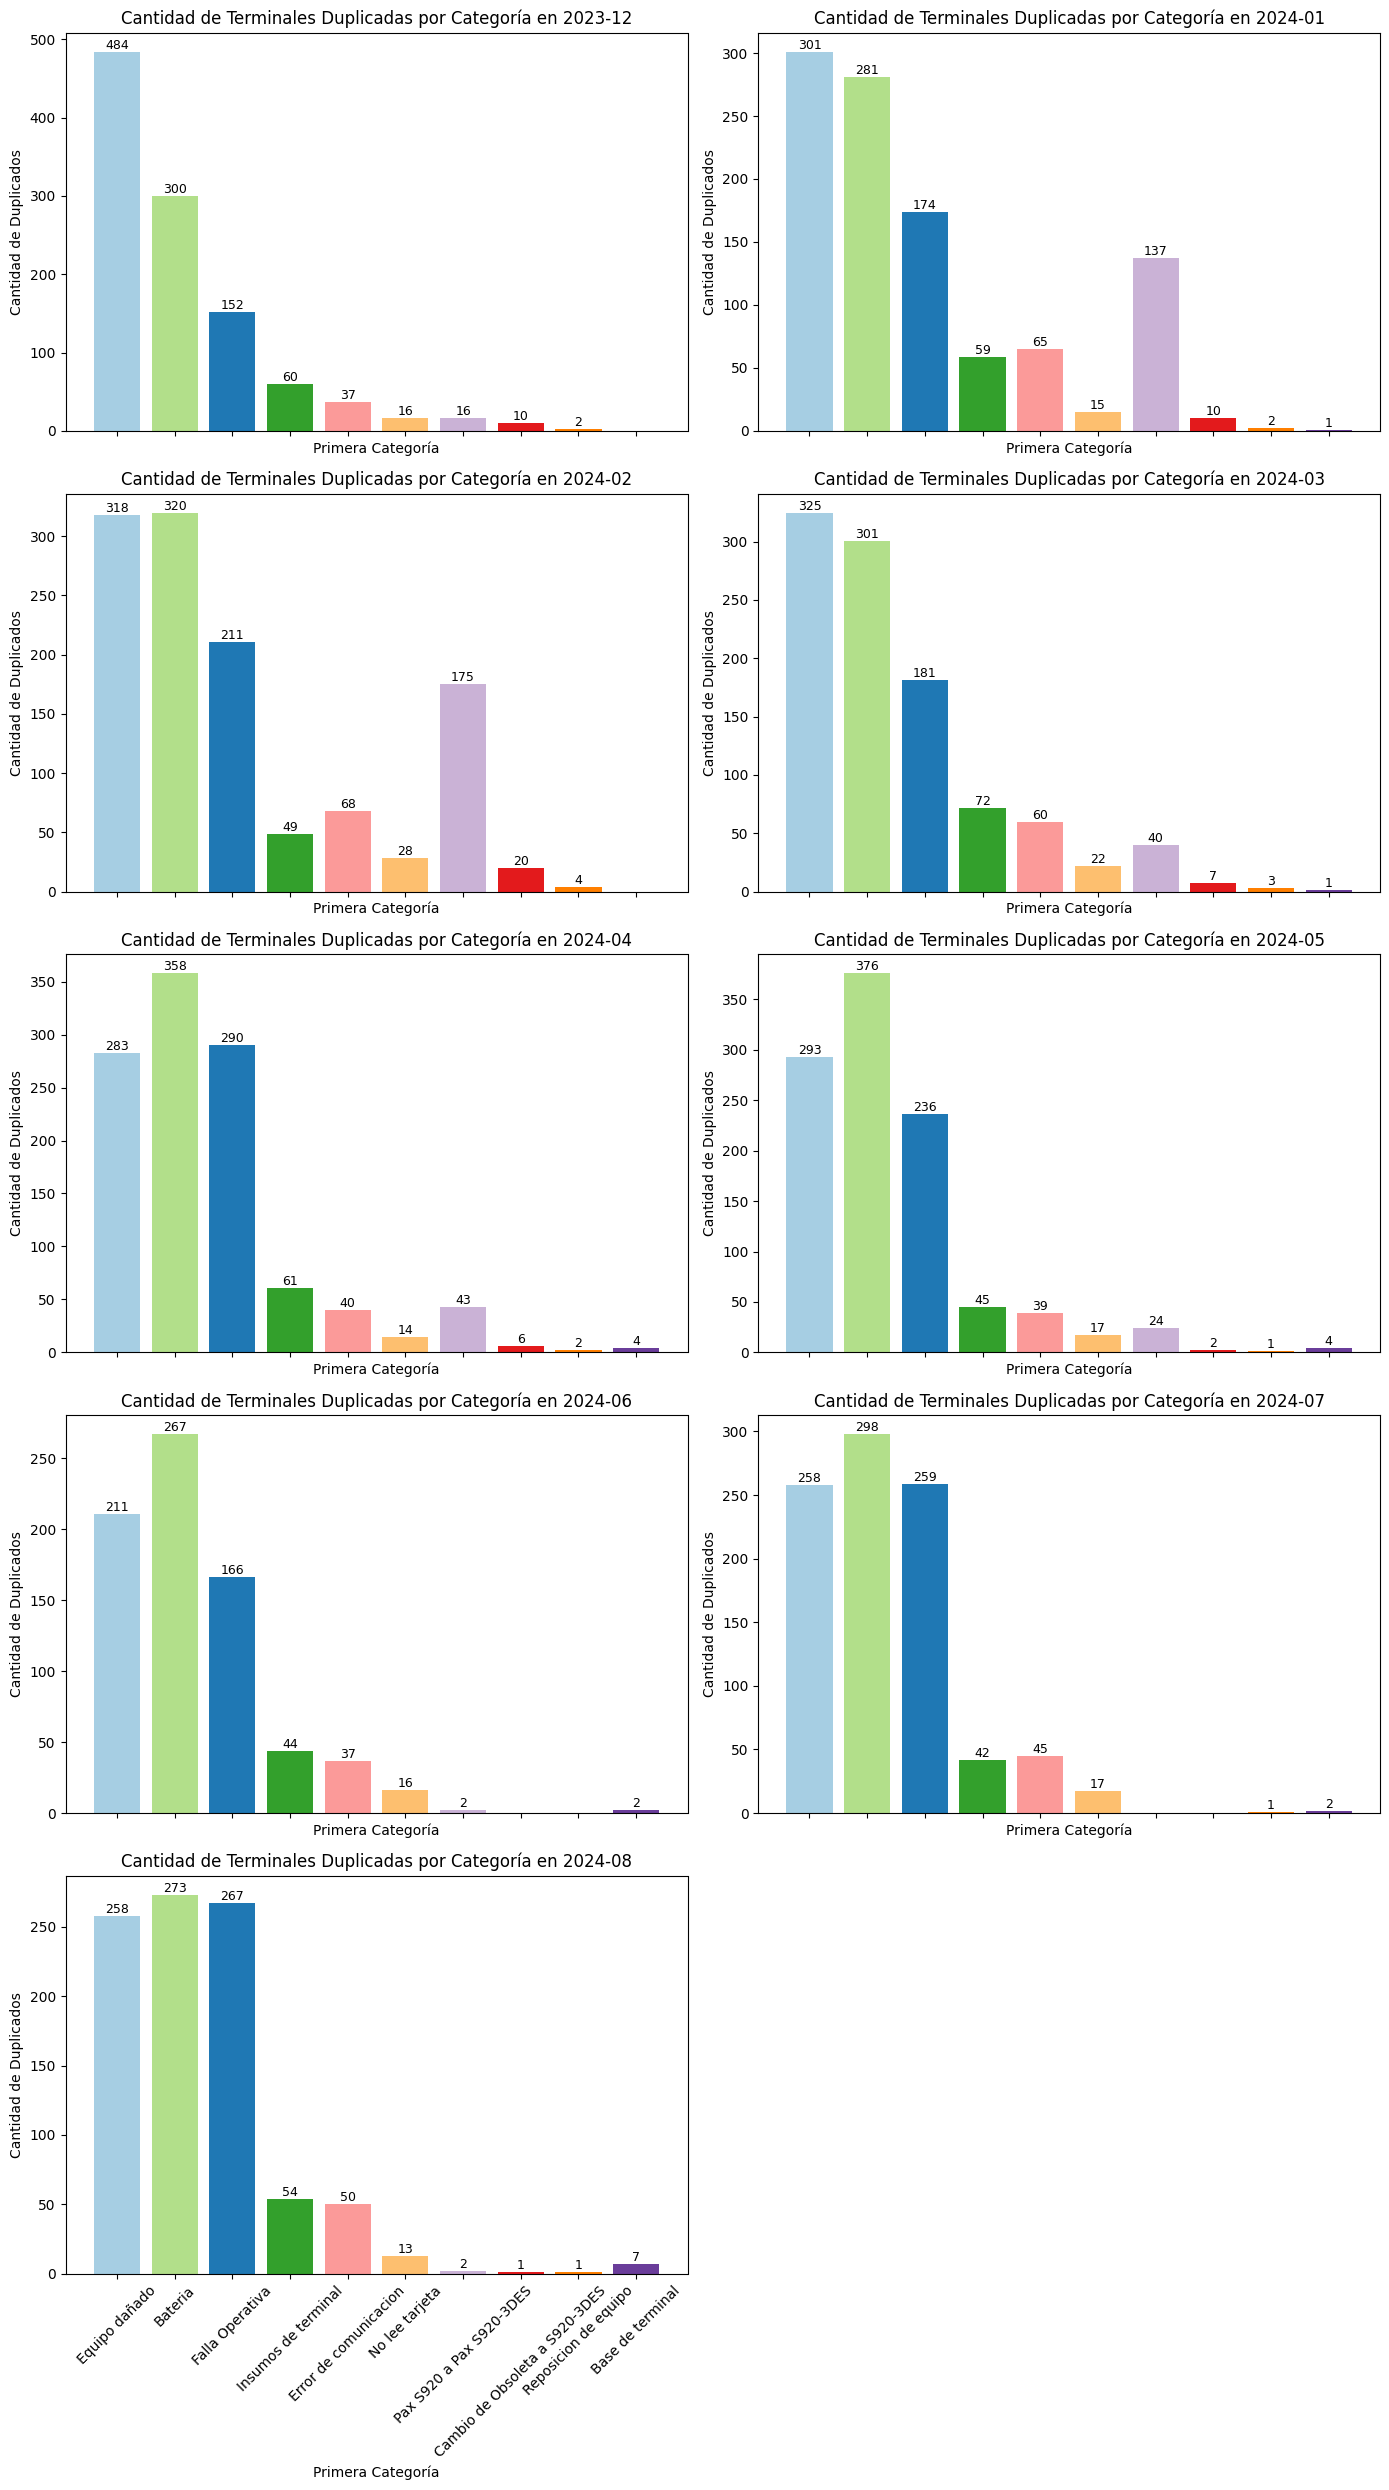

In [123]:

df_av = df[(df['Tipo'] == 'AV') & (df['FechaCierre'].dt.month != 9)]
duplicados_av = df_av[df_av.duplicated(subset=['Numero Terminal'], keep='first')]
df_duplicados_av = df_av[df_av['Numero Terminal'].isin(duplicados_av['Numero Terminal'])]
df_duplicados_av['Mes'] = df_duplicados_av['FechaCierre'].dt.to_period('M')
meses = sorted(df_duplicados_av['Mes'].unique())
n_filas = len(meses) // 2 + len(meses) % 2  
categorias = df_duplicados_av['Primera Categoría'].unique()
n_categorias = len(categorias)
colores = sns.color_palette('Paired', n_colors=n_categorias)
color_dict = dict(zip(categorias, colores))
fig, axes = plt.subplots(n_filas, 2, figsize=(14, n_filas * 5), sharex=True)
axes = axes.flatten()
for i, mes in enumerate(meses):
    df_mes = df_duplicados_av[df_duplicados_av['Mes'] == mes]
    conteo_categoria_mes = df_mes['Primera Categoría'].value_counts()
    bars = axes[i].bar(conteo_categoria_mes.index, conteo_categoria_mes.values, color=[color_dict[cat] for cat in conteo_categoria_mes.index])
    axes[i].set_title(f'Cantidad de Terminales Duplicadas por Categoría en {mes}')
    axes[i].set_xlabel('Primera Categoría')
    axes[i].set_ylabel('Cantidad de Duplicados')
    axes[i].tick_params(axis='x', rotation=45)
    for bar, label in zip(bars, conteo_categoria_mes.values):
        axes[i].text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f'{label}',
            ha='center',
            va='bottom',
            fontsize=9
        )

if len(meses) % 2 != 0:
    fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()


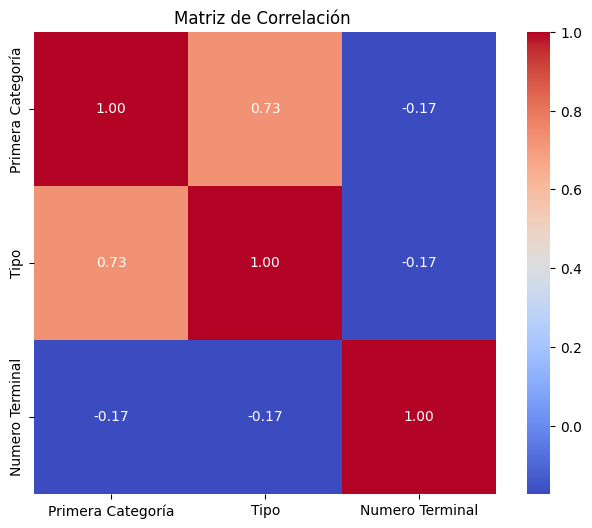

In [127]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

#Para poder ver la correlacion, necesito asegurarme que las variables sean datos numericos
df['Primera Categoría'] = label_encoder.fit_transform(df['Primera Categoría'])
df['Tipo'] = label_encoder.fit_transform(df['Tipo'])
correlation_matrix = df[['Primera Categoría', 'Tipo', 'Numero Terminal']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar=True)

plt.title("Matriz de Correlación ")
plt.show()


In [ ]:
#Como vemos, hay una fuerte correlacion entre las variables.

#Primera Categoría : El resultado es 1 porque esta correlacionada consigo misma. 
#Tipo : Hay una correlacion muy positiva entre Primera Categoria y Tipo. Esto significa que dependiendo el tipo de orden, vamos a tener una u otra primera categoria. 
#Numero Terminal : Practicamente no hay una correlacion, ya que el numero de terminal no influye en el tipo de orden ni la categoria que tenga la misma. 

#La varible Target esta fuertemente correlacionada con el tipo de orden y la primera categoria. Esto esta dentro de lo previsto, ya que si constantemente tenemos un mismo tipo y una primera categoria, seria ideal poder tomar acciones al respecto.

In [ ]:
#Probamos el rendimiento del modelo.

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [137]:
#Selección de Variables de Interés
# Variables independientes (Ventas y Descuentos)
X = df[['Primera Categoría', 'Numero Terminal']]

# Variable dependiente (Ganancias)
y = df['Tipo']

In [148]:
# Conjunto de entrenamiento y prueba (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)
# Evaluación del modelo
# Calcula el MSE y el RMSE
mse = mean_squared_error(y_test, y_pred)  # Error cuadrático medio (MSE)
rmse = np.sqrt(mse)  # Error cuadrático medio raíz (RMSE)
r2 = r2_score(y_test, y_pred)  # Coeficiente de determinación (R²)

# Imprime los resultados
print(f'Error cuadrático medio (MSE): {mse}')
print(f'Error cuadrático medio raíz (RMSE): {rmse}')
print(f'Coeficiente de determinación (R²): {r2}')

Error cuadrático medio (MSE): 1.1918717209311425
Error cuadrático medio raíz (RMSE): 1.0917287762677792
Coeficiente de determinación (R²): 0.5296028517088182


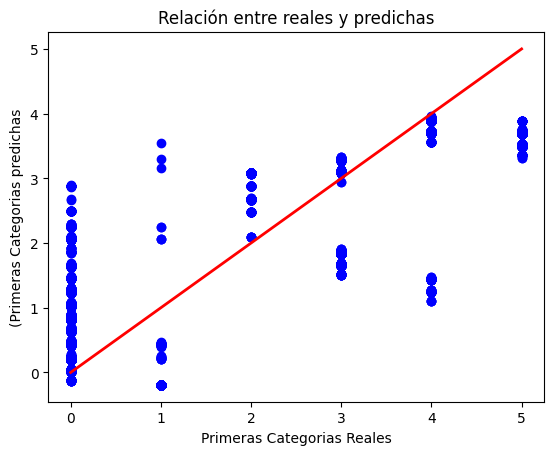

In [139]:
# Gráfico de predicciones vs valores reales
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)  # Línea ideal
plt.xlabel('Primeras Categorias Reales')
plt.ylabel('(Primeras Categorias predichas')
plt.title('Relación entre reales y predichas')
plt.show()

In [ ]:
#Como podemos ver, el modelo funcionaria de manera correcta al tener un MSE bajo (1.19)
#Sumado a eso, el RMSE se encuentra muy cerca del 0, lo que nos dice que tiene poco margen de error. Es esperable, ya que el servicio es dinamico y depende de muchas variables.
#Un R2 de 0.5296, nos dice que modelo explica aproximadamente el 53.96% de la variación en la variable dependiente.
#En conclusion, el modelo de regresion lineal parece una alternativa optima
#De igual manera, probamos mas modelos predictivos para defirnir cual es el mejor en nuestro caso.

In [154]:
def evaluar_modelo(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f'Error cuadrático medio (MSE): {mse:.2f}')
    print(f'Error cuadrático medio raíz (RMSE): {rmse:.2f}')
    print(f'Coeficiente de determinación (R²): {r2:.2f}')
    return mse, rmse, r2

In [155]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Dividimos en variables independientes (X) y dependiente (y)
X = df[['Primera Categoría', 'Numero Terminal']]
y = df['Tipo']

# Datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [156]:
def evaluar_modelo(y_test, y_pred):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f'Error cuadrático medio (MSE): {mse:.2f}')
    print(f'Error cuadrático medio raíz (RMSE): {rmse:.2f}')
    print(f'Coeficiente de determinación (R²): {r2:.2f}')
    return mse, rmse, r2

In [168]:
# Creo y entreno el modelo de Random Forest
modelo_rf = RandomForestRegressor(random_state=42)
modelo_rf.fit(X_train, y_train)

# Predecir y evaluar
y_pred_rf = modelo_rf.predict(X_test)
print("\nResultados de Random Forest:")
evaluar_modelo(y_test, y_pred_rf)


Resultados de Random Forest:
Error cuadrático medio (MSE): 0.00
Error cuadrático medio raíz (RMSE): 0.04
Coeficiente de determinación (R²): 1.00


(np.float64(0.0017821952624022834),
 np.float64(0.04221605455750553),
 0.9992966192968509)

In [169]:
# Creo y entreno el modelo de Gradient Boosting
modelo_gb = GradientBoostingRegressor(random_state=42)
modelo_gb.fit(X_train, y_train)

# Predecir y evaluar
y_pred_gb = modelo_gb.predict(X_test)
print("\nResultados de Gradient Boosting:")
evaluar_modelo(y_test, y_pred_gb)


Resultados de Gradient Boosting:
Error cuadrático medio (MSE): 0.00
Error cuadrático medio raíz (RMSE): 0.07
Coeficiente de determinación (R²): 1.00


(np.float64(0.004692709209017292),
 np.float64(0.06850335180863264),
 0.9981479239829963)

In [170]:
# Crear y entrenar el modelo de regresión lineal
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)

# Predecir y evaluar
y_pred_lr = modelo_lr.predict(X_test)
print("Resultados de Regresión Lineal:")
evaluar_modelo(y_test, y_pred_lr)

Resultados de Regresión Lineal:
Error cuadrático medio (MSE): 1.19
Error cuadrático medio raíz (RMSE): 1.09
Coeficiente de determinación (R²): 0.53


(np.float64(1.1918717209311425),
 np.float64(1.0917287762677792),
 0.5296028517088182)

In [171]:
# Creo una tabla comparando los resultados.
resultados = pd.DataFrame({
    "Modelo": ["Regresión Lineal", "Random Forest", "Gradient Boosting"],
    "MSE": [mean_squared_error(y_test, y_pred_lr),
            mean_squared_error(y_test, y_pred_rf),
            mean_squared_error(y_test, y_pred_gb)],
    "RMSE": [np.sqrt(mean_squared_error(y_test, y_pred_lr)),
             np.sqrt(mean_squared_error(y_test, y_pred_rf)),
             np.sqrt(mean_squared_error(y_test, y_pred_gb))],
    "R²": [r2_score(y_test, y_pred_lr),
           r2_score(y_test, y_pred_rf),
           r2_score(y_test, y_pred_gb)]
})

print(resultados)

              Modelo       MSE      RMSE        R²
0   Regresión Lineal  1.191872  1.091729  0.529603
1      Random Forest  0.001782  0.042216  0.999297
2  Gradient Boosting  0.004693  0.068503  0.998148


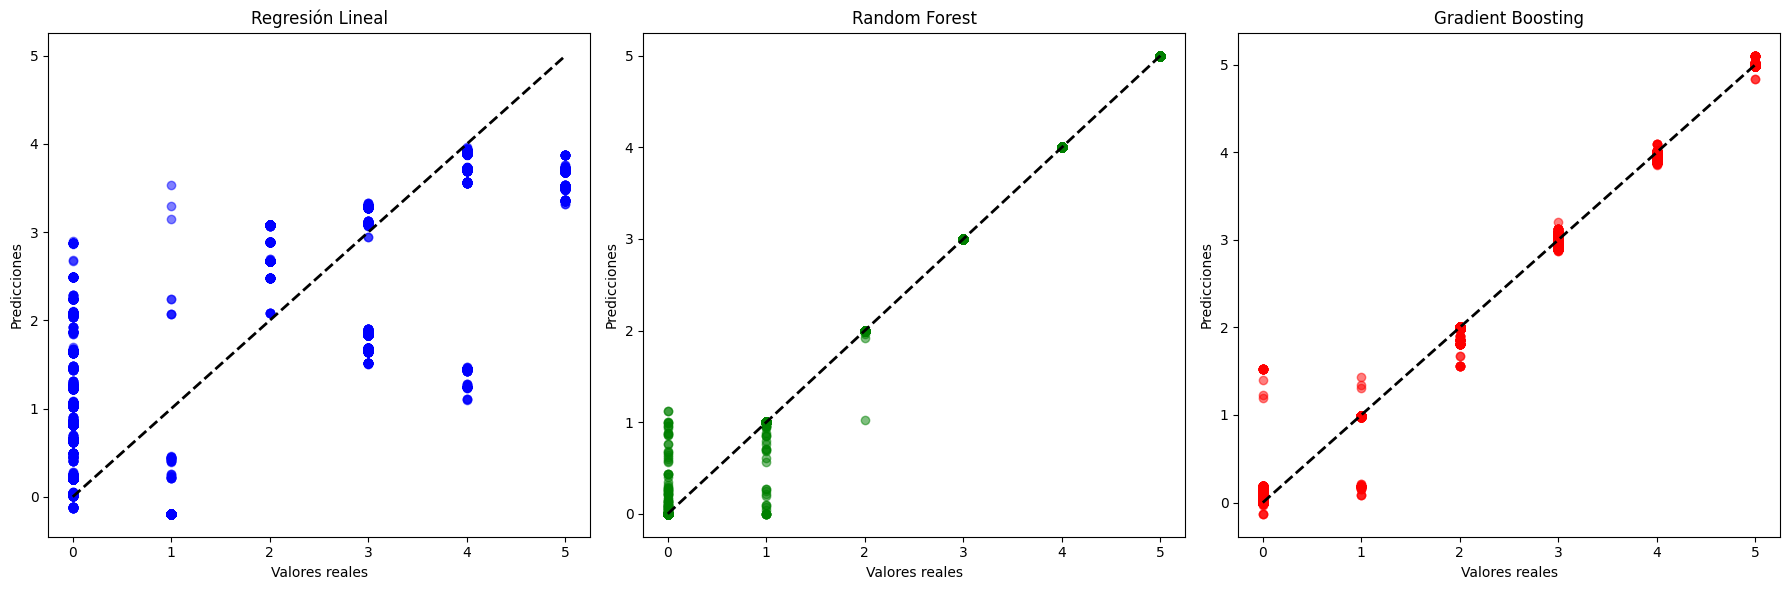

In [172]:
#Para una comparacion mas practica, grafico los resultados.
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Modelo de Regresión Lineal
axs[0].scatter(y_test, y_pred_lr, color='blue', alpha=0.5)
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=2)
axs[0].set_title('Regresión Lineal')
axs[0].set_xlabel('Valores reales')
axs[0].set_ylabel('Predicciones')

# Modelo de Random Forest
axs[1].scatter(y_test, y_pred_rf, color='green', alpha=0.5)
axs[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=2)
axs[1].set_title('Random Forest')
axs[1].set_xlabel('Valores reales')
axs[1].set_ylabel('Predicciones')

# Modelo de Gradient Boosting
axs[2].scatter(y_test, y_pred_gb, color='red', alpha=0.5)
axs[2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', linewidth=2)
axs[2].set_title('Gradient Boosting')
axs[2].set_xlabel('Valores reales')
axs[2].set_ylabel('Predicciones')

plt.tight_layout()
plt.show()


In [173]:
# Datos de los resultados
model_results = {
    'Modelo': ['Regresión Lineal', 'Random Forest', 'Gradient Boosting'],
    'MSE': [54538025.651, 49775084.807, 34298536.316],
    'RMSE': [233533.778, 223103.305, 185198.640],
    'R2': [-0.124840, -0.026605, 0.292597]
}

# Crear DataFrame
df_results = pd.DataFrame(model_results)

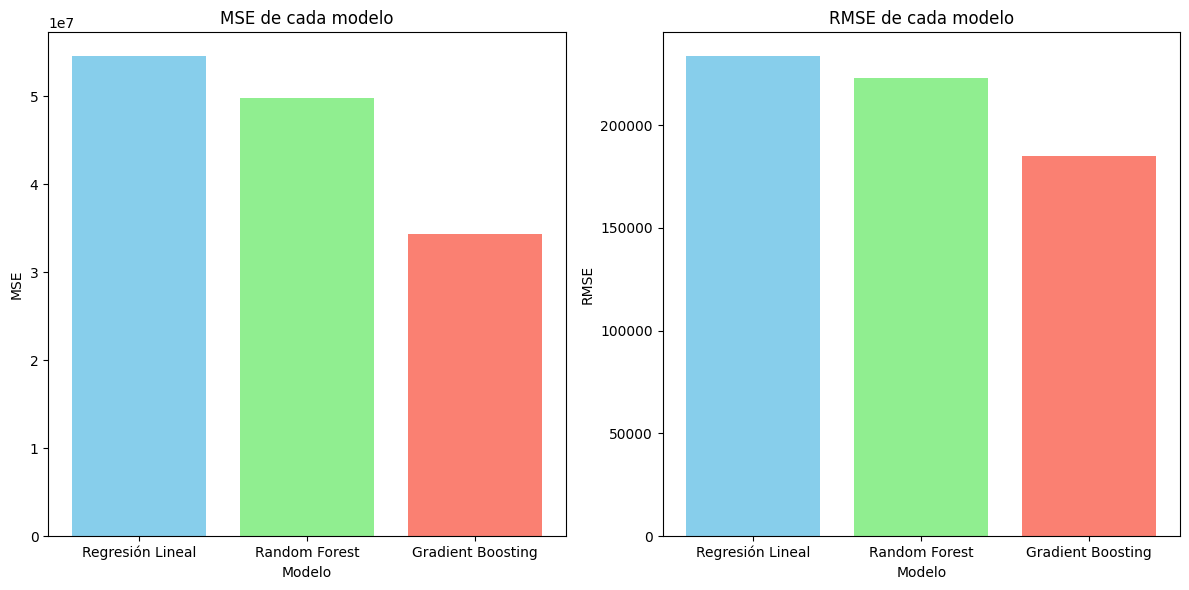

In [174]:
# Gráfico
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico de MSE
ax[0].bar(df_results['Modelo'], df_results['MSE'], color=['skyblue', 'lightgreen', 'salmon'])
ax[0].set_title('MSE de cada modelo')
ax[0].set_xlabel('Modelo')
ax[0].set_ylabel('MSE')

# Gráfico de RMSE
ax[1].bar(df_results['Modelo'], df_results['RMSE'], color=['skyblue', 'lightgreen', 'salmon'])
ax[1].set_title('RMSE de cada modelo')
ax[1].set_xlabel('Modelo')
ax[1].set_ylabel('RMSE')

plt.tight_layout()
plt.show()

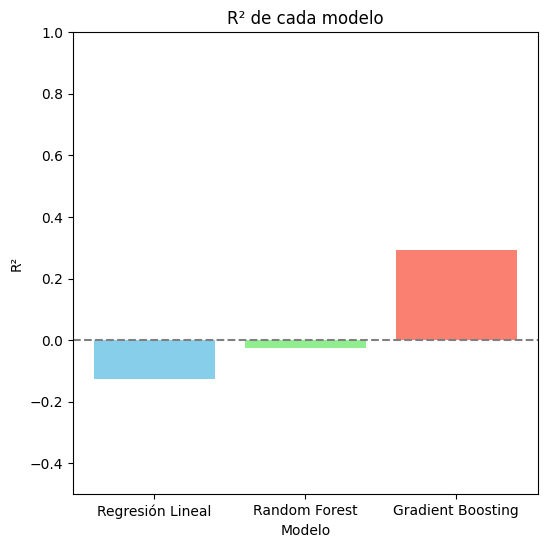

In [175]:
# Gráfico de barras para R²
plt.figure(figsize=(6, 6))
plt.bar(df_results['Modelo'], df_results['R2'], color=['skyblue', 'lightgreen', 'salmon'])
plt.title('R² de cada modelo')
plt.xlabel('Modelo')
plt.ylabel('R²')
plt.ylim(-0.5, 1)  # Ajusta el rango del eje y para visualizar mejor los resultados
plt.axhline(0, color='grey', linestyle='--')  # Línea de referencia en R² = 0
plt.show()

In [ ]:
Error Cuadrático Medio (MSE):

El modelo de Gradient Boosting tiene el MSE más bajo (0.001782), lo cual significa que sus predicciones son más precisas que las de Random Forest y Regresión Lineal.
(RMSE) Gradient Boosting nuevamente tiene el menor RMSE (185.198.640), lo que indica que el error promedio de sus predicciones es menor en comparación con los otros modelos.
R² (Coeficiente de Determinación) Solo Gradient Boosting tiene un R² positivo (0.99,) casi perfecto, lo que suguiere que el explica casi la totalidad de la variabilidad de los datos.DeprecationWarning

In [ ]:
En conclusion, Gradient Boosting es el mejor modelo para poder predecir lo que buscamos.
Podemos sumar variables como el rango de fechas de cierre e ingreso, con el fin de poder detectar cuantas terminales ingresan mas de 1 vez en un periodo de 30 dias.
Esto, para poder analizar la posibilidad de ofrecer un tipo de producto distinto al cliente, con el fin de poder mejorar la experiencia del cliente y la facturacion mensual al reducir los gastos por traslado y la no facturacion por entrar en periodo de garantia. 